#  importing_libraray

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import sklearn
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
import glob
import glob as gb
from sklearn import preprocessing
from matplotlib import pyplot as plt
import plotly.express as px
from skimage.transform import AffineTransform, warp
from skimage import io, img_as_ubyte
from sklearn import  metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
%matplotlib inline
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from pathlib import Path
from PIL import Image 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Dropout, Dense,Flatten
import re
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import LabelBinarizer 
import PIL 
import cv2

# Using_function 

In [2]:
def create_label(df):
    res = []
    for i in range(len(df)):
        res.append("id_{}_label_{}".format((i), df.iloc[i]["label"]))
    return res

In [14]:
def load_images(path):
    pathes_list = np.sort(glob.glob(path))
    features = np.empty((len(pathes_list), 32, 32), dtype=np.float32)
    for index, file_path in enumerate(pathes_list):
        features[index] = Image.open(file_path).convert('L')
    return features

In [75]:
def display_image(images, labels, pos):
    image = images[pos].squeeze()
    plt.title('Example %d. Label: %s' % (pos, characters_dict[labels[pos]-1]))
    plt.imshow(image, cmap=plt.cm.gray_r)

In [4]:
def read_img(root_dir, img):
    img_path = "{}{}".format(root_dir, img)
    img = cv2.imread(img_path)
    plt.imshow(img)
    h, w, c = img.shape
    print(h, w, c)

In [30]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(28), predictions_array, color="black")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [11]:
def plot_image(i, predictions_array, true_label, img):
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(True)
  plt.xticks([])
  plt.yticks([])
  
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
    
  if predicted_label == true_label:
    color = 'black'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(characters_dict[predicted_label],
                                100*np.max(predictions_array),
                                characters_dict[true_label]),
                                color=color)

In [62]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='black', label='ROC')
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# loading_dataset

In [12]:
train = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\input\\arabic-hwr-ai-pro-intake1\\train.csv")
test = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\input\\arabic-hwr-ai-pro-intake1\\test.csv")

In [15]:
train_features = load_images("C:\\Users\\Lenovo\\Desktop\\input\\arabic-hwr-ai-pro-intake1\\train\\*")
test_features = load_images("C:\\Users\\Lenovo\\Desktop\\input\\arabic-hwr-ai-pro-intake1\\test\\*")

# Exploration_dataset

In [10]:

train.head()

,id,label
0,0,24
1,1,2
2,2,17
3,3,14
4,4,19


In [9]:
train.shape

(13440, 2)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      13440 non-null  int64
 1   label   13440 non-null  int64
dtypes: int64(2)
memory usage: 210.1 KB


In [105]:
test.head()

,id
0,0
1,1
2,2
3,3
4,4


In [13]:
test.shape

(3360, 1)

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3360 non-null   int64
dtypes: int64(1)
memory usage: 26.4 KB


In [38]:
print(train_features.shape)
print(test_features.shape)

(13440, 32, 32)
(3360, 32, 32)


In [17]:
classes = np.unique(train["label"].values)
num_classes = len(classes)
classes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

# Decoding_class

In [28]:
characters = ["ا","ب","ت","ث","ج","ح","خ","د","ذ","ر","ز","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ك","ل","م","ن","ه","و","ي"]

characters_dict = dict(zip(np.arange(0,len(characters)), characters))
characters_dict

{0: 'ا',
 1: 'ب',
 2: 'ت',
 3: 'ث',
 4: 'ج',
 5: 'ح',
 6: 'خ',
 7: 'د',
 8: 'ذ',
 9: 'ر',
 10: 'ز',
 11: 'س',
 12: 'ش',
 13: 'ص',
 14: 'ض',
 15: 'ط',
 16: 'ظ',
 17: 'ع',
 18: 'غ',
 19: 'ف',
 20: 'ق',
 21: 'ك',
 22: 'ل',
 23: 'م',
 24: 'ن',
 25: 'ه',
 26: 'و',
 27: 'ي'}

# Visulise_dataset

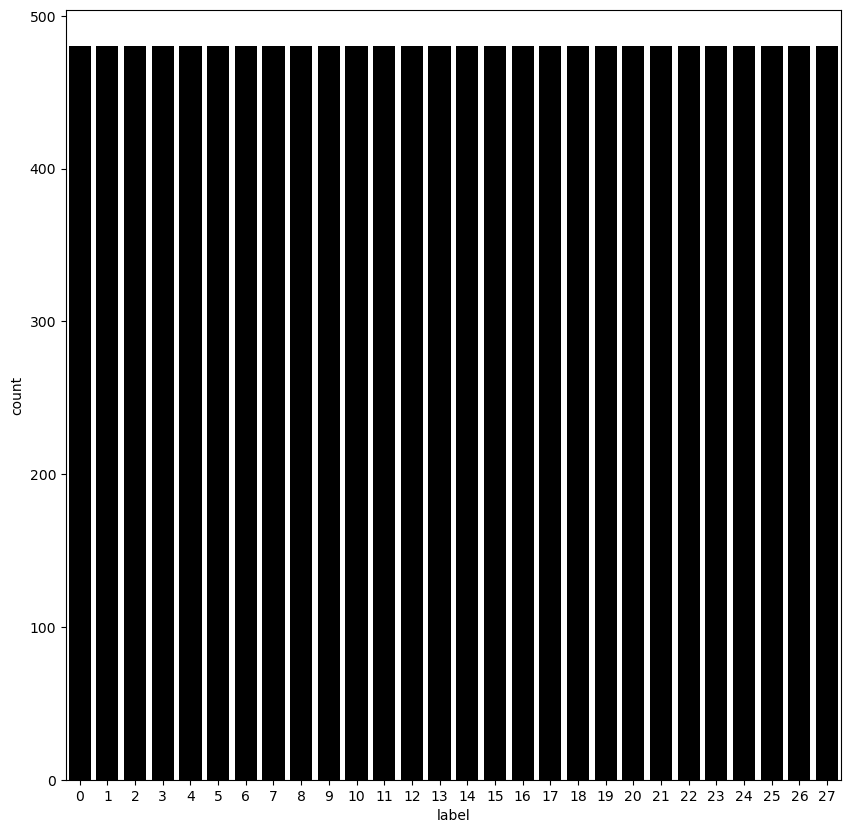

In [49]:
#train.groupby(by='label').count()
fig, ax = plt.subplots(figsize=(10, 10))
g = sns.countplot(data=train, x="label", color="black")
g.set_xticklabels(characters_dict);

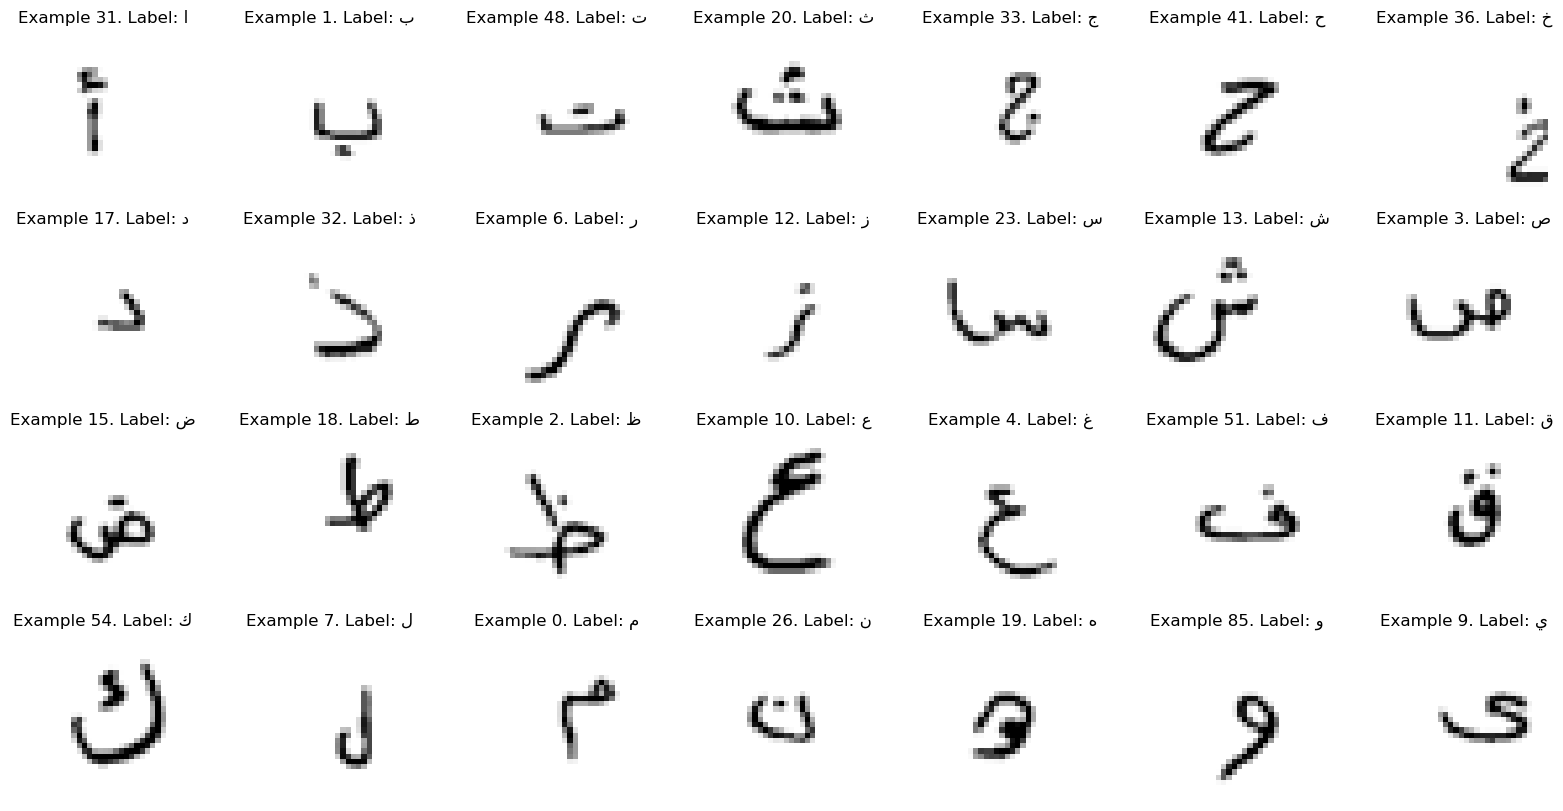

In [55]:
fig, ax = plt.subplots(4, 7, figsize=(20, 10))
index_list = train.groupby('label').first()['id'].tolist()
i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        display_image(train_features, train['label'], index_list[i])
        plt.axis('off')
        i+=1

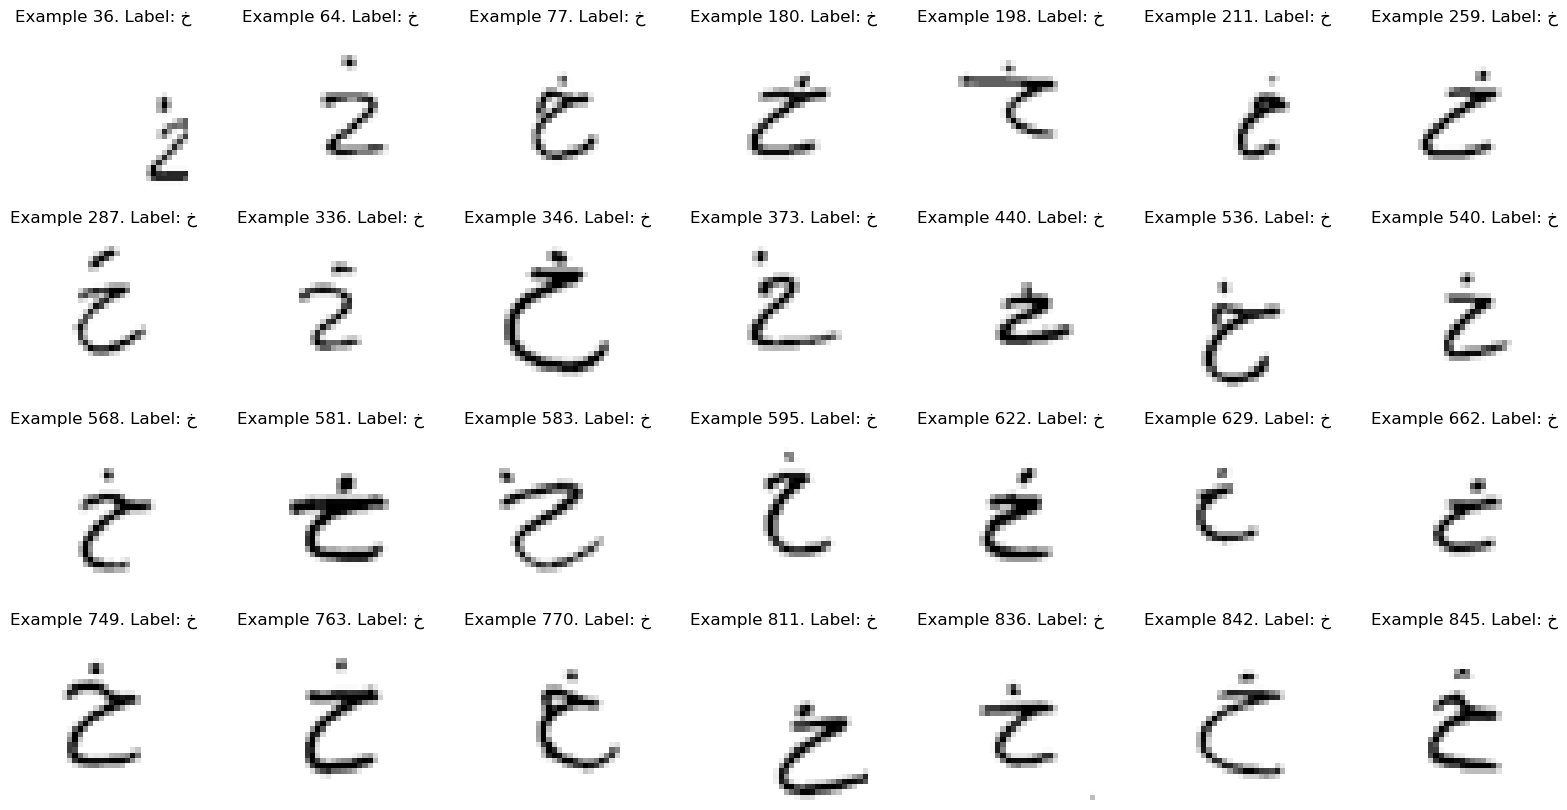

In [61]:
fig, ax = plt.subplots(4, 7, figsize=(20, 10))
index_list = train[train['label']==7].iloc[:28, :]['id'].tolist()
i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        display_image(train_features, train['label'], index_list[i])
        plt.axis('off')
        i+=1

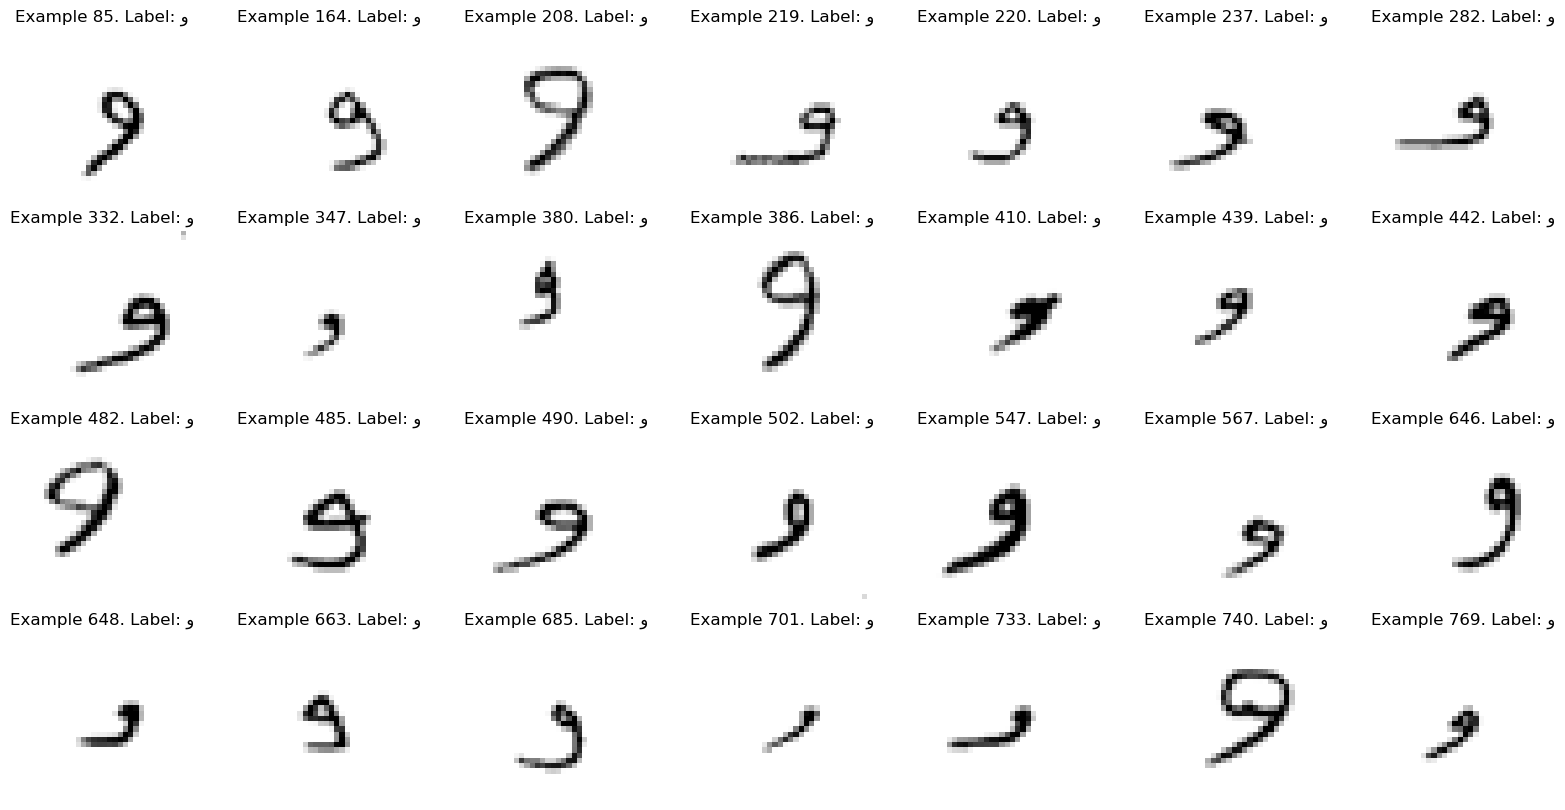

In [64]:
fig, ax = plt.subplots(4, 7, figsize=(20, 10))
index_list = train[train['label']==27].iloc[:28, :]['id'].tolist()
i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        display_image(train_features, train['label'], index_list[i])
        plt.axis('off')
        i+=1

# Spliting_to _validation_for_testing

In [17]:
xtrain = {}
test = {}
validation = {}
xtrain['features'], validation['features'], xtrain['labels'], validation['labels'] = train_test_split(train_features, train['label'], test_size=0.2, stratify=train['label'],random_state=42)

In [18]:
print(' of training images:', xtrain['features'].shape)
print(' of validation images:', validation['features'].shape)
print(' of training labels:', xtrain['labels'].shape)
print('of validation labels:', validation['labels'].shape)

 of training images: (10752, 32, 32)
 of validation images: (2688, 32, 32)
 of training labels: (10752,)
of validation labels: (2688,)


# Normalize_and_reshaping

In [19]:
images_train = xtrain['features'].reshape((-1, 32, 32, 1))
print("images shape: {}".format(images_train.shape))
images_train = images_train/255

images shape: (10752, 32, 32, 1)


In [20]:
image_val=validation['features'].reshape((-1, 32, 32, 1))
print("images shape: {}".format(image_val.shape))
images_val = image_val/255

images shape: (2688, 32, 32, 1)


# Encoding_label

In [21]:
binencoder = LabelBinarizer()
y = binencoder.fit_transform(xtrain['labels'].to_numpy())
print("y shape: {}".format(y.shape))
print(y[0:5])

y shape: (10752, 28)
[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [23]:
binencoder = LabelBinarizer()
yv = binencoder.fit_transform(validation['labels'].to_numpy())
print("y shape: {}".format(yv.shape))
print(y[0:5])

y shape: (2688, 28)
[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [34]:
print(y.sum(axis=0))
print(yv.sum(axis=0))

[384 384 384 384 384 384 384 384 384 384 384 384 384 384 384 384 384 384
 384 384 384 384 384 384 384 384 384 384]
[96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96 96
 96 96 96 96]


# Creating_Model

In [158]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=3,input_shape=(32,32,1),padding ='same', activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(Conv2D(filters=32,kernel_size=3,padding ='same',activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=3,padding ='same',activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128,kernel_size=3,padding ='same',activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Flatten())
model.add(Dense(128,activation='tanh', kernel_initializer='he_uniform',kernel_regularizer='l2'))
model.add(BatchNormalization())


model.add(Dense(28, activation='softmax'))

# compiling_and_summary

In [159]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [160]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 16)        160       
                                                                 
 batch_normalization_34 (Bat  (None, 32, 32, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 16, 16, 16)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_35 (Bat  (None, 16, 16, 32)      

# Check_Point_in every_epoch_to_comp_improve

In [161]:
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, monitor='val_accuracy', mode='max', save_best_only=True)

earltstopping = EarlyStopping(monitor='val_accurracy',patience=7, min_delta=0.001)


# Fitting_Model

In [162]:
hist = model.fit(images_train, y, validation_split=0.2, epochs=500, batch_size=30, callbacks=[checkpointer,earltstopping])

Epoch 1/500
287/287 [==============================] - ETA: 0s - loss: 4.2846 - accuracy: 0.2923
Epoch 1: val_accuracy improved from -inf to 0.09484, saving model to weights.hdf5
287/287 [==============================] - 7s 20ms/step - loss: 4.2846 - accuracy: 0.2923 - val_loss: 7.4564 - val_accuracy: 0.0948
Epoch 2/500
285/287 [============================>.] - ETA: 0s - loss: 2.1702 - accuracy: 0.5815
Epoch 2: val_accuracy improved from 0.09484 to 0.47234, saving model to weights.hdf5
287/287 [==============================] - 5s 19ms/step - loss: 2.1676 - accuracy: 0.5818 - val_loss: 2.2613 - val_accuracy: 0.4723
Epoch 3/500
284/287 [============================>.] - ETA: 0s - loss: 1.3253 - accuracy: 0.7059
Epoch 3: val_accuracy improved from 0.47234 to 0.72989, saving model to weights.hdf5
287/287 [==============================] - 5s 18ms/step - loss: 1.3216 - accuracy: 0.7067 - val_loss: 1.1086 - val_accuracy: 0.7299
Epoch 4/500
284/287 [============================>.] - ETA: 0

Epoch 19/500
284/287 [============================>.] - ETA: 0s - loss: 0.3060 - accuracy: 0.9158
Epoch 19: val_accuracy did not improve from 0.93212
287/287 [==============================] - 5s 18ms/step - loss: 0.3054 - accuracy: 0.9163 - val_loss: 0.2874 - val_accuracy: 0.9247
Epoch 20/500
285/287 [============================>.] - ETA: 0s - loss: 0.2914 - accuracy: 0.9232
Epoch 20: val_accuracy did not improve from 0.93212
287/287 [==============================] - 5s 18ms/step - loss: 0.2930 - accuracy: 0.9230 - val_loss: 0.3131 - val_accuracy: 0.9289
Epoch 21/500
287/287 [==============================] - ETA: 0s - loss: 0.2980 - accuracy: 0.9212
Epoch 21: val_accuracy did not improve from 0.93212
287/287 [==============================] - 5s 18ms/step - loss: 0.2980 - accuracy: 0.9212 - val_loss: 0.3612 - val_accuracy: 0.9107
Epoch 22/500
286/287 [============================>.] - ETA: 0s - loss: 0.2773 - accuracy: 0.9274
Epoch 22: val_accuracy did not improve from 0.93212
287/

287/287 [==============================] - 5s 18ms/step - loss: 0.2204 - accuracy: 0.9458 - val_loss: 0.2593 - val_accuracy: 0.9340
Epoch 38/500
287/287 [==============================] - ETA: 0s - loss: 0.2254 - accuracy: 0.9428
Epoch 38: val_accuracy did not improve from 0.94840
287/287 [==============================] - 5s 19ms/step - loss: 0.2254 - accuracy: 0.9428 - val_loss: 0.2439 - val_accuracy: 0.9475
Epoch 39/500
284/287 [============================>.] - ETA: 0s - loss: 0.2213 - accuracy: 0.9445
Epoch 39: val_accuracy did not improve from 0.94840
287/287 [==============================] - 5s 19ms/step - loss: 0.2226 - accuracy: 0.9441 - val_loss: 0.2481 - val_accuracy: 0.9447
Epoch 40/500
284/287 [============================>.] - ETA: 0s - loss: 0.2060 - accuracy: 0.9474
Epoch 40: val_accuracy did not improve from 0.94840
287/287 [==============================] - 5s 18ms/step - loss: 0.2053 - accuracy: 0.9477 - val_loss: 0.3203 - val_accuracy: 0.9270
Epoch 41/500
284/287 [

287/287 [==============================] - 5s 19ms/step - loss: 0.1912 - accuracy: 0.9564 - val_loss: 0.2474 - val_accuracy: 0.9503
Epoch 57/500
287/287 [==============================] - ETA: 0s - loss: 0.1841 - accuracy: 0.9562
Epoch 57: val_accuracy improved from 0.95026 to 0.95165, saving model to weights.hdf5
287/287 [==============================] - 5s 18ms/step - loss: 0.1841 - accuracy: 0.9562 - val_loss: 0.2299 - val_accuracy: 0.9517
Epoch 58/500
285/287 [============================>.] - ETA: 0s - loss: 0.1911 - accuracy: 0.9544
Epoch 58: val_accuracy did not improve from 0.95165
287/287 [==============================] - 5s 18ms/step - loss: 0.1917 - accuracy: 0.9542 - val_loss: 0.2621 - val_accuracy: 0.9489
Epoch 59/500
285/287 [============================>.] - ETA: 0s - loss: 0.1811 - accuracy: 0.9588
Epoch 59: val_accuracy did not improve from 0.95165
287/287 [==============================] - 5s 18ms/step - loss: 0.1810 - accuracy: 0.9590 - val_loss: 0.2584 - val_accur

Epoch 75/500
286/287 [============================>.] - ETA: 0s - loss: 0.1614 - accuracy: 0.9647
Epoch 75: val_accuracy did not improve from 0.95676
287/287 [==============================] - 6s 20ms/step - loss: 0.1614 - accuracy: 0.9647 - val_loss: 0.2211 - val_accuracy: 0.9479
Epoch 76/500
285/287 [============================>.] - ETA: 0s - loss: 0.1604 - accuracy: 0.9634
Epoch 76: val_accuracy did not improve from 0.95676
287/287 [==============================] - 6s 20ms/step - loss: 0.1612 - accuracy: 0.9634 - val_loss: 0.2744 - val_accuracy: 0.9451
Epoch 77/500
286/287 [============================>.] - ETA: 0s - loss: 0.1713 - accuracy: 0.9618
Epoch 77: val_accuracy did not improve from 0.95676
287/287 [==============================] - 6s 20ms/step - loss: 0.1713 - accuracy: 0.9617 - val_loss: 0.2352 - val_accuracy: 0.9470
Epoch 78/500
287/287 [==============================] - ETA: 0s - loss: 0.1626 - accuracy: 0.9640
Epoch 78: val_accuracy did not improve from 0.95676
287/

287/287 [==============================] - 5s 18ms/step - loss: 0.1411 - accuracy: 0.9693 - val_loss: 0.2415 - val_accuracy: 0.9493
Epoch 94/500
286/287 [============================>.] - ETA: 0s - loss: 0.1423 - accuracy: 0.9685
Epoch 94: val_accuracy did not improve from 0.95909
287/287 [==============================] - 5s 18ms/step - loss: 0.1423 - accuracy: 0.9685 - val_loss: 0.2629 - val_accuracy: 0.9507
Epoch 95/500
286/287 [============================>.] - ETA: 0s - loss: 0.1502 - accuracy: 0.9660
Epoch 95: val_accuracy did not improve from 0.95909
287/287 [==============================] - 5s 18ms/step - loss: 0.1500 - accuracy: 0.9661 - val_loss: 0.2034 - val_accuracy: 0.9577
Epoch 96/500
285/287 [============================>.] - ETA: 0s - loss: 0.1471 - accuracy: 0.9671
Epoch 96: val_accuracy did not improve from 0.95909
287/287 [==============================] - 5s 18ms/step - loss: 0.1470 - accuracy: 0.9672 - val_loss: 0.2115 - val_accuracy: 0.9530
Epoch 97/500
284/287 [

287/287 [==============================] - 5s 18ms/step - loss: 0.1377 - accuracy: 0.9710 - val_loss: 0.1968 - val_accuracy: 0.9596
Epoch 113/500
287/287 [==============================] - ETA: 0s - loss: 0.1249 - accuracy: 0.9728
Epoch 113: val_accuracy did not improve from 0.96513
287/287 [==============================] - 5s 18ms/step - loss: 0.1249 - accuracy: 0.9728 - val_loss: 0.2578 - val_accuracy: 0.9512
Epoch 114/500
285/287 [============================>.] - ETA: 0s - loss: 0.1342 - accuracy: 0.9694
Epoch 114: val_accuracy did not improve from 0.96513
287/287 [==============================] - 5s 18ms/step - loss: 0.1342 - accuracy: 0.9691 - val_loss: 0.2899 - val_accuracy: 0.9307
Epoch 115/500
286/287 [============================>.] - ETA: 0s - loss: 0.1313 - accuracy: 0.9718
Epoch 115: val_accuracy did not improve from 0.96513
287/287 [==============================] - 5s 18ms/step - loss: 0.1311 - accuracy: 0.9719 - val_loss: 0.2253 - val_accuracy: 0.9507
Epoch 116/500
28

287/287 [==============================] - ETA: 0s - loss: 0.1212 - accuracy: 0.9742
Epoch 131: val_accuracy did not improve from 0.96513
287/287 [==============================] - 5s 19ms/step - loss: 0.1212 - accuracy: 0.9742 - val_loss: 0.2295 - val_accuracy: 0.9563
Epoch 132/500
284/287 [============================>.] - ETA: 0s - loss: 0.1308 - accuracy: 0.9732
Epoch 132: val_accuracy did not improve from 0.96513
287/287 [==============================] - 5s 19ms/step - loss: 0.1303 - accuracy: 0.9735 - val_loss: 0.2316 - val_accuracy: 0.9433
Epoch 133/500
284/287 [============================>.] - ETA: 0s - loss: 0.1076 - accuracy: 0.9792
Epoch 133: val_accuracy did not improve from 0.96513
287/287 [==============================] - 5s 18ms/step - loss: 0.1079 - accuracy: 0.9792 - val_loss: 0.2092 - val_accuracy: 0.9507
Epoch 134/500
286/287 [============================>.] - ETA: 0s - loss: 0.1252 - accuracy: 0.9712
Epoch 134: val_accuracy did not improve from 0.96513
287/287 [=

287/287 [==============================] - 5s 19ms/step - loss: 0.1217 - accuracy: 0.9762 - val_loss: 0.1898 - val_accuracy: 0.9600
Epoch 150/500
286/287 [============================>.] - ETA: 0s - loss: 0.1138 - accuracy: 0.9754
Epoch 150: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 19ms/step - loss: 0.1137 - accuracy: 0.9755 - val_loss: 0.2177 - val_accuracy: 0.9586
Epoch 151/500
285/287 [============================>.] - ETA: 0s - loss: 0.1093 - accuracy: 0.9770
Epoch 151: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 19ms/step - loss: 0.1091 - accuracy: 0.9771 - val_loss: 0.2080 - val_accuracy: 0.9628
Epoch 152/500
285/287 [============================>.] - ETA: 0s - loss: 0.1117 - accuracy: 0.9772
Epoch 152: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.1116 - accuracy: 0.9772 - val_loss: 0.2744 - val_accuracy: 0.9242
Epoch 153/500
28

287/287 [==============================] - 5s 18ms/step - loss: 0.1117 - accuracy: 0.9750 - val_loss: 0.2691 - val_accuracy: 0.9526
Epoch 169/500
287/287 [==============================] - ETA: 0s - loss: 0.1121 - accuracy: 0.9751
Epoch 169: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 19ms/step - loss: 0.1121 - accuracy: 0.9751 - val_loss: 0.2166 - val_accuracy: 0.9605
Epoch 170/500
286/287 [============================>.] - ETA: 0s - loss: 0.1131 - accuracy: 0.9746
Epoch 170: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.1130 - accuracy: 0.9747 - val_loss: 0.2128 - val_accuracy: 0.9521
Epoch 171/500
285/287 [============================>.] - ETA: 0s - loss: 0.1014 - accuracy: 0.9804
Epoch 171: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.1012 - accuracy: 0.9805 - val_loss: 0.2248 - val_accuracy: 0.9582
Epoch 172/500
28

287/287 [==============================] - 5s 18ms/step - loss: 0.1068 - accuracy: 0.9792 - val_loss: 0.2078 - val_accuracy: 0.9479
Epoch 188/500
287/287 [==============================] - ETA: 0s - loss: 0.0920 - accuracy: 0.9827
Epoch 188: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 17ms/step - loss: 0.0920 - accuracy: 0.9827 - val_loss: 0.2243 - val_accuracy: 0.9568
Epoch 189/500
287/287 [==============================] - ETA: 0s - loss: 0.1002 - accuracy: 0.9779
Epoch 189: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.1002 - accuracy: 0.9779 - val_loss: 0.1876 - val_accuracy: 0.9558
Epoch 190/500
287/287 [==============================] - ETA: 0s - loss: 0.1057 - accuracy: 0.9770
Epoch 190: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.1057 - accuracy: 0.9770 - val_loss: 0.1981 - val_accuracy: 0.9605
Epoch 191/500
28

287/287 [==============================] - 5s 19ms/step - loss: 0.0890 - accuracy: 0.9807 - val_loss: 0.1992 - val_accuracy: 0.9540
Epoch 207/500
285/287 [============================>.] - ETA: 0s - loss: 0.0917 - accuracy: 0.9806
Epoch 207: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 19ms/step - loss: 0.0922 - accuracy: 0.9804 - val_loss: 0.2202 - val_accuracy: 0.9586
Epoch 208/500
287/287 [==============================] - ETA: 0s - loss: 0.0967 - accuracy: 0.9802
Epoch 208: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 19ms/step - loss: 0.0967 - accuracy: 0.9802 - val_loss: 0.2004 - val_accuracy: 0.9582
Epoch 209/500
285/287 [============================>.] - ETA: 0s - loss: 0.0949 - accuracy: 0.9816
Epoch 209: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.0954 - accuracy: 0.9816 - val_loss: 0.2313 - val_accuracy: 0.9558
Epoch 210/500
28

287/287 [==============================] - 5s 18ms/step - loss: 0.0976 - accuracy: 0.9784 - val_loss: 0.2325 - val_accuracy: 0.9554
Epoch 226/500
284/287 [============================>.] - ETA: 0s - loss: 0.1061 - accuracy: 0.9772
Epoch 226: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.1058 - accuracy: 0.9772 - val_loss: 0.1987 - val_accuracy: 0.9642
Epoch 227/500
284/287 [============================>.] - ETA: 0s - loss: 0.0947 - accuracy: 0.9786
Epoch 227: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.0947 - accuracy: 0.9786 - val_loss: 0.1730 - val_accuracy: 0.9642
Epoch 228/500
286/287 [============================>.] - ETA: 0s - loss: 0.0847 - accuracy: 0.9838
Epoch 228: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.0853 - accuracy: 0.9837 - val_loss: 0.2148 - val_accuracy: 0.9614
Epoch 229/500
28

287/287 [==============================] - 6s 19ms/step - loss: 0.0902 - accuracy: 0.9827 - val_loss: 0.2143 - val_accuracy: 0.9637
Epoch 245/500
285/287 [============================>.] - ETA: 0s - loss: 0.0862 - accuracy: 0.9839
Epoch 245: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 19ms/step - loss: 0.0862 - accuracy: 0.9838 - val_loss: 0.2018 - val_accuracy: 0.9614
Epoch 246/500
285/287 [============================>.] - ETA: 0s - loss: 0.0871 - accuracy: 0.9832
Epoch 246: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 19ms/step - loss: 0.0873 - accuracy: 0.9830 - val_loss: 0.1724 - val_accuracy: 0.9647
Epoch 247/500
286/287 [============================>.] - ETA: 0s - loss: 0.0913 - accuracy: 0.9814
Epoch 247: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 19ms/step - loss: 0.0912 - accuracy: 0.9814 - val_loss: 0.1737 - val_accuracy: 0.9647
Epoch 248/500
28

287/287 [==============================] - 5s 18ms/step - loss: 0.0890 - accuracy: 0.9804 - val_loss: 0.2056 - val_accuracy: 0.9619
Epoch 264/500
287/287 [==============================] - ETA: 0s - loss: 0.0944 - accuracy: 0.9809
Epoch 264: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.0944 - accuracy: 0.9809 - val_loss: 0.1888 - val_accuracy: 0.9651
Epoch 265/500
285/287 [============================>.] - ETA: 0s - loss: 0.0873 - accuracy: 0.9821
Epoch 265: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.0873 - accuracy: 0.9821 - val_loss: 0.2139 - val_accuracy: 0.9554
Epoch 266/500
286/287 [============================>.] - ETA: 0s - loss: 0.0839 - accuracy: 0.9816
Epoch 266: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 19ms/step - loss: 0.0847 - accuracy: 0.9814 - val_loss: 0.2691 - val_accuracy: 0.9535
Epoch 267/500
28

287/287 [==============================] - 5s 19ms/step - loss: 0.0806 - accuracy: 0.9826 - val_loss: 0.2557 - val_accuracy: 0.9479
Epoch 283/500
284/287 [============================>.] - ETA: 0s - loss: 0.0943 - accuracy: 0.9805
Epoch 283: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.0943 - accuracy: 0.9804 - val_loss: 0.2520 - val_accuracy: 0.9507
Epoch 284/500
285/287 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.9843
Epoch 284: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.0774 - accuracy: 0.9844 - val_loss: 0.1896 - val_accuracy: 0.9563
Epoch 285/500
284/287 [============================>.] - ETA: 0s - loss: 0.0881 - accuracy: 0.9816
Epoch 285: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 19ms/step - loss: 0.0882 - accuracy: 0.9814 - val_loss: 0.2293 - val_accuracy: 0.9530
Epoch 286/500
28

287/287 [==============================] - 6s 19ms/step - loss: 0.0755 - accuracy: 0.9851 - val_loss: 0.2601 - val_accuracy: 0.9540
Epoch 302/500
285/287 [============================>.] - ETA: 0s - loss: 0.0814 - accuracy: 0.9834
Epoch 302: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 19ms/step - loss: 0.0819 - accuracy: 0.9831 - val_loss: 0.2267 - val_accuracy: 0.9609
Epoch 303/500
285/287 [============================>.] - ETA: 0s - loss: 0.0944 - accuracy: 0.9781
Epoch 303: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 19ms/step - loss: 0.0943 - accuracy: 0.9781 - val_loss: 0.1980 - val_accuracy: 0.9637
Epoch 304/500
285/287 [============================>.] - ETA: 0s - loss: 0.0793 - accuracy: 0.9828
Epoch 304: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.0796 - accuracy: 0.9826 - val_loss: 0.2253 - val_accuracy: 0.9563
Epoch 305/500
28

287/287 [==============================] - 5s 19ms/step - loss: 0.0666 - accuracy: 0.9872 - val_loss: 0.2509 - val_accuracy: 0.9563
Epoch 321/500
284/287 [============================>.] - ETA: 0s - loss: 0.0741 - accuracy: 0.9851
Epoch 321: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 19ms/step - loss: 0.0743 - accuracy: 0.9849 - val_loss: 0.1967 - val_accuracy: 0.9619
Epoch 322/500
286/287 [============================>.] - ETA: 0s - loss: 0.0860 - accuracy: 0.9824
Epoch 322: val_accuracy did not improve from 0.96792
287/287 [==============================] - 6s 20ms/step - loss: 0.0860 - accuracy: 0.9824 - val_loss: 0.2370 - val_accuracy: 0.9596
Epoch 323/500
287/287 [==============================] - ETA: 0s - loss: 0.0764 - accuracy: 0.9852
Epoch 323: val_accuracy did not improve from 0.96792
287/287 [==============================] - 5s 18ms/step - loss: 0.0764 - accuracy: 0.9852 - val_loss: 0.1779 - val_accuracy: 0.9642
Epoch 324/500
28

287/287 [==============================] - 5s 19ms/step - loss: 0.0699 - accuracy: 0.9869 - val_loss: 0.2135 - val_accuracy: 0.9619
Epoch 340/500
286/287 [============================>.] - ETA: 0s - loss: 0.0775 - accuracy: 0.9833
Epoch 340: val_accuracy did not improve from 0.96978
287/287 [==============================] - 5s 19ms/step - loss: 0.0776 - accuracy: 0.9833 - val_loss: 0.1895 - val_accuracy: 0.9679
Epoch 341/500
285/287 [============================>.] - ETA: 0s - loss: 0.0711 - accuracy: 0.9874
Epoch 341: val_accuracy did not improve from 0.96978
287/287 [==============================] - 5s 19ms/step - loss: 0.0720 - accuracy: 0.9872 - val_loss: 0.1989 - val_accuracy: 0.9544
Epoch 342/500
286/287 [============================>.] - ETA: 0s - loss: 0.0679 - accuracy: 0.9881
Epoch 342: val_accuracy did not improve from 0.96978
287/287 [==============================] - 6s 20ms/step - loss: 0.0678 - accuracy: 0.9881 - val_loss: 0.1903 - val_accuracy: 0.9568
Epoch 343/500
28

284/287 [============================>.] - ETA: 0s - loss: 0.0770 - accuracy: 0.9854
Epoch 358: val_accuracy did not improve from 0.96978
287/287 [==============================] - 6s 19ms/step - loss: 0.0766 - accuracy: 0.9856 - val_loss: 0.1868 - val_accuracy: 0.9633
Epoch 359/500
285/287 [============================>.] - ETA: 0s - loss: 0.0716 - accuracy: 0.9865
Epoch 359: val_accuracy did not improve from 0.96978
287/287 [==============================] - 5s 19ms/step - loss: 0.0721 - accuracy: 0.9864 - val_loss: 0.2071 - val_accuracy: 0.9647
Epoch 360/500
287/287 [==============================] - ETA: 0s - loss: 0.0837 - accuracy: 0.9812
Epoch 360: val_accuracy did not improve from 0.96978
287/287 [==============================] - 5s 19ms/step - loss: 0.0837 - accuracy: 0.9812 - val_loss: 0.1837 - val_accuracy: 0.9563
Epoch 361/500
286/287 [============================>.] - ETA: 0s - loss: 0.0816 - accuracy: 0.9829
Epoch 361: val_accuracy did not improve from 0.96978
287/287 [=

287/287 [==============================] - 5s 18ms/step - loss: 0.0751 - accuracy: 0.9845 - val_loss: 0.2040 - val_accuracy: 0.9619
Epoch 377/500
284/287 [============================>.] - ETA: 0s - loss: 0.0786 - accuracy: 0.9837
Epoch 377: val_accuracy did not improve from 0.96978
287/287 [==============================] - 5s 18ms/step - loss: 0.0786 - accuracy: 0.9837 - val_loss: 0.1575 - val_accuracy: 0.9623
Epoch 378/500
287/287 [==============================] - ETA: 0s - loss: 0.0734 - accuracy: 0.9856
Epoch 378: val_accuracy did not improve from 0.96978
287/287 [==============================] - 5s 19ms/step - loss: 0.0734 - accuracy: 0.9856 - val_loss: 0.1872 - val_accuracy: 0.9670
Epoch 379/500
284/287 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.9839
Epoch 379: val_accuracy did not improve from 0.96978
287/287 [==============================] - 5s 19ms/step - loss: 0.0782 - accuracy: 0.9840 - val_loss: 0.2152 - val_accuracy: 0.9605
Epoch 380/500
28

287/287 [==============================] - 5s 18ms/step - loss: 0.0810 - accuracy: 0.9827 - val_loss: 0.1950 - val_accuracy: 0.9609
Epoch 396/500
285/287 [============================>.] - ETA: 0s - loss: 0.0745 - accuracy: 0.9842
Epoch 396: val_accuracy did not improve from 0.96978
287/287 [==============================] - 5s 18ms/step - loss: 0.0743 - accuracy: 0.9843 - val_loss: 0.2134 - val_accuracy: 0.9651
Epoch 397/500
286/287 [============================>.] - ETA: 0s - loss: 0.0705 - accuracy: 0.9859
Epoch 397: val_accuracy did not improve from 0.96978
287/287 [==============================] - 5s 19ms/step - loss: 0.0705 - accuracy: 0.9858 - val_loss: 0.1929 - val_accuracy: 0.9633
Epoch 398/500
285/287 [============================>.] - ETA: 0s - loss: 0.0824 - accuracy: 0.9823
Epoch 398: val_accuracy did not improve from 0.96978
287/287 [==============================] - 5s 18ms/step - loss: 0.0824 - accuracy: 0.9822 - val_loss: 0.1676 - val_accuracy: 0.9693
Epoch 399/500
28

287/287 [==============================] - 5s 18ms/step - loss: 0.0784 - accuracy: 0.9831 - val_loss: 0.2352 - val_accuracy: 0.9582
Epoch 415/500
287/287 [==============================] - ETA: 0s - loss: 0.0731 - accuracy: 0.9857
Epoch 415: val_accuracy did not improve from 0.96978
287/287 [==============================] - 5s 18ms/step - loss: 0.0731 - accuracy: 0.9857 - val_loss: 0.4763 - val_accuracy: 0.8568
Epoch 416/500
286/287 [============================>.] - ETA: 0s - loss: 0.0801 - accuracy: 0.9829
Epoch 416: val_accuracy did not improve from 0.96978
287/287 [==============================] - 5s 18ms/step - loss: 0.0800 - accuracy: 0.9829 - val_loss: 0.2456 - val_accuracy: 0.9605
Epoch 417/500
285/287 [============================>.] - ETA: 0s - loss: 0.0687 - accuracy: 0.9864
Epoch 417: val_accuracy did not improve from 0.96978
287/287 [==============================] - 5s 18ms/step - loss: 0.0686 - accuracy: 0.9865 - val_loss: 0.1714 - val_accuracy: 0.9656
Epoch 418/500
28

287/287 [==============================] - 6s 19ms/step - loss: 0.0710 - accuracy: 0.9867 - val_loss: 0.1906 - val_accuracy: 0.9633
Epoch 434/500
285/287 [============================>.] - ETA: 0s - loss: 0.0743 - accuracy: 0.9827
Epoch 434: val_accuracy did not improve from 0.96978
287/287 [==============================] - 6s 19ms/step - loss: 0.0742 - accuracy: 0.9828 - val_loss: 0.2184 - val_accuracy: 0.9586
Epoch 435/500
286/287 [============================>.] - ETA: 0s - loss: 0.0748 - accuracy: 0.9851
Epoch 435: val_accuracy did not improve from 0.96978
287/287 [==============================] - 6s 19ms/step - loss: 0.0748 - accuracy: 0.9851 - val_loss: 0.3172 - val_accuracy: 0.9117
Epoch 436/500
284/287 [============================>.] - ETA: 0s - loss: 0.0663 - accuracy: 0.9873
Epoch 436: val_accuracy did not improve from 0.96978
287/287 [==============================] - 6s 19ms/step - loss: 0.0666 - accuracy: 0.9873 - val_loss: 0.1766 - val_accuracy: 0.9670
Epoch 437/500
28

287/287 [==============================] - 6s 20ms/step - loss: 0.0739 - accuracy: 0.9857 - val_loss: 0.1775 - val_accuracy: 0.9661
Epoch 453/500
286/287 [============================>.] - ETA: 0s - loss: 0.0720 - accuracy: 0.9864
Epoch 453: val_accuracy did not improve from 0.97025
287/287 [==============================] - 6s 19ms/step - loss: 0.0719 - accuracy: 0.9864 - val_loss: 0.2377 - val_accuracy: 0.9596
Epoch 454/500
286/287 [============================>.] - ETA: 0s - loss: 0.0645 - accuracy: 0.9892
Epoch 454: val_accuracy did not improve from 0.97025
287/287 [==============================] - 6s 21ms/step - loss: 0.0644 - accuracy: 0.9892 - val_loss: 0.1950 - val_accuracy: 0.9600
Epoch 455/500
287/287 [==============================] - ETA: 0s - loss: 0.0592 - accuracy: 0.9880
Epoch 455: val_accuracy did not improve from 0.97025
287/287 [==============================] - 6s 20ms/step - loss: 0.0592 - accuracy: 0.9880 - val_loss: 0.2083 - val_accuracy: 0.9619
Epoch 456/500
28

286/287 [============================>.] - ETA: 0s - loss: 0.0702 - accuracy: 0.9847
Epoch 471: val_accuracy did not improve from 0.97025
287/287 [==============================] - 5s 18ms/step - loss: 0.0701 - accuracy: 0.9848 - val_loss: 0.2718 - val_accuracy: 0.9503
Epoch 472/500
285/287 [============================>.] - ETA: 0s - loss: 0.0583 - accuracy: 0.9891
Epoch 472: val_accuracy did not improve from 0.97025
287/287 [==============================] - 5s 18ms/step - loss: 0.0583 - accuracy: 0.9891 - val_loss: 0.1743 - val_accuracy: 0.9582
Epoch 473/500
286/287 [============================>.] - ETA: 0s - loss: 0.0666 - accuracy: 0.9871
Epoch 473: val_accuracy did not improve from 0.97025
287/287 [==============================] - 5s 19ms/step - loss: 0.0668 - accuracy: 0.9870 - val_loss: 0.1809 - val_accuracy: 0.9628
Epoch 474/500
286/287 [============================>.] - ETA: 0s - loss: 0.0666 - accuracy: 0.9871
Epoch 474: val_accuracy did not improve from 0.97025
287/287 [=

287/287 [==============================] - 5s 18ms/step - loss: 0.0678 - accuracy: 0.9867 - val_loss: 0.1748 - val_accuracy: 0.9577
Epoch 490/500
286/287 [============================>.] - ETA: 0s - loss: 0.0681 - accuracy: 0.9887
Epoch 490: val_accuracy did not improve from 0.97025
287/287 [==============================] - 5s 18ms/step - loss: 0.0682 - accuracy: 0.9887 - val_loss: 0.2243 - val_accuracy: 0.9628
Epoch 491/500
287/287 [==============================] - ETA: 0s - loss: 0.0673 - accuracy: 0.9879
Epoch 491: val_accuracy did not improve from 0.97025
287/287 [==============================] - 5s 19ms/step - loss: 0.0673 - accuracy: 0.9879 - val_loss: 0.2010 - val_accuracy: 0.9628
Epoch 492/500
285/287 [============================>.] - ETA: 0s - loss: 0.0694 - accuracy: 0.9862
Epoch 492: val_accuracy did not improve from 0.97025
287/287 [==============================] - 5s 18ms/step - loss: 0.0697 - accuracy: 0.9862 - val_loss: 0.1707 - val_accuracy: 0.9679
Epoch 493/500
28

# Load_Moadel

In [8]:
new_model=keras.models.load_model("weights.hdf5")

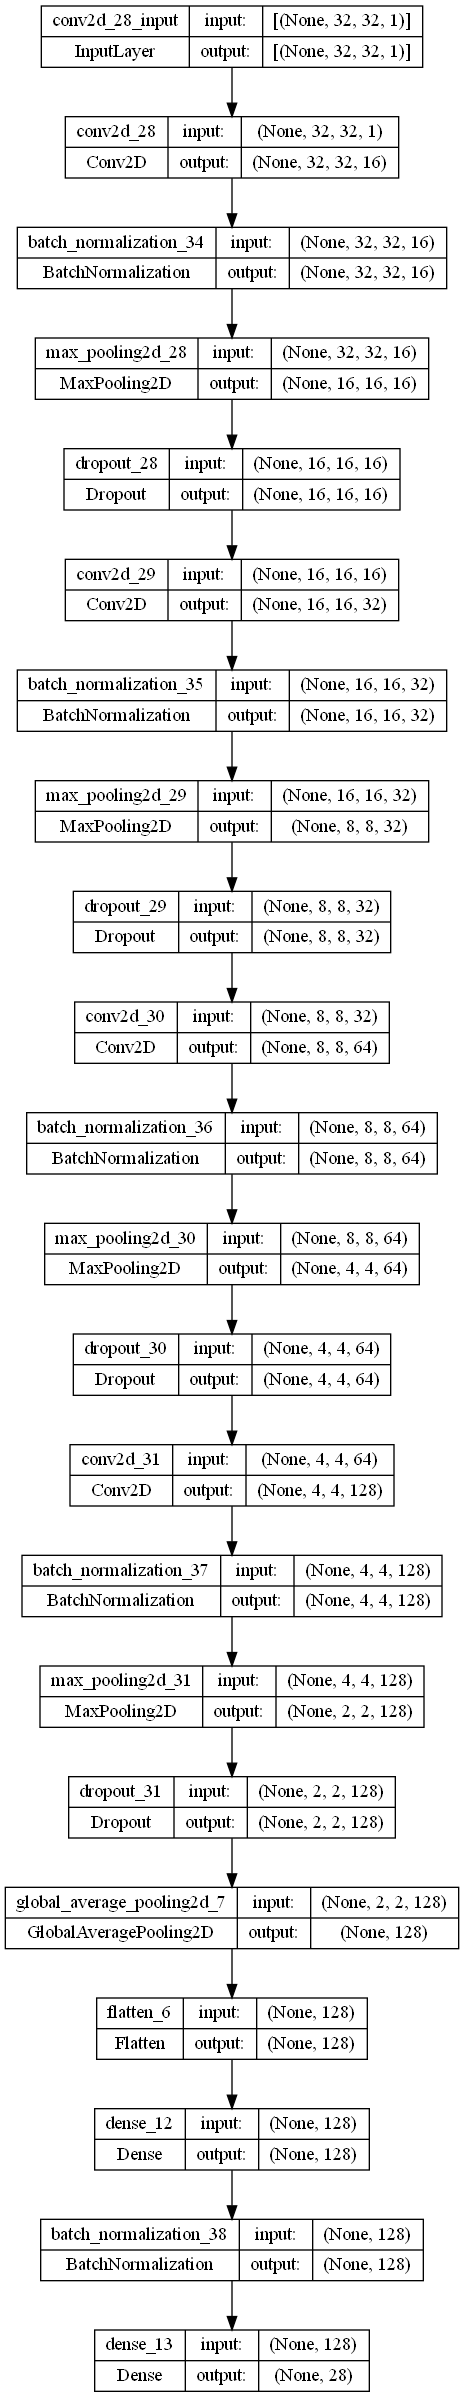

In [6]:

from tensorflow.keras.utils import plot_model

plot_model(new_model, show_shapes = True)

# ACC_VALIDTION EVALUTE

In [24]:
new_model.evaluate(images_val, yv)

84/84 [==============================] - 1s 5ms/step - loss: 0.1771 - accuracy: 0.9721


[0.17710427939891815, 0.9720982313156128]

# Plotting_Loss_ACC

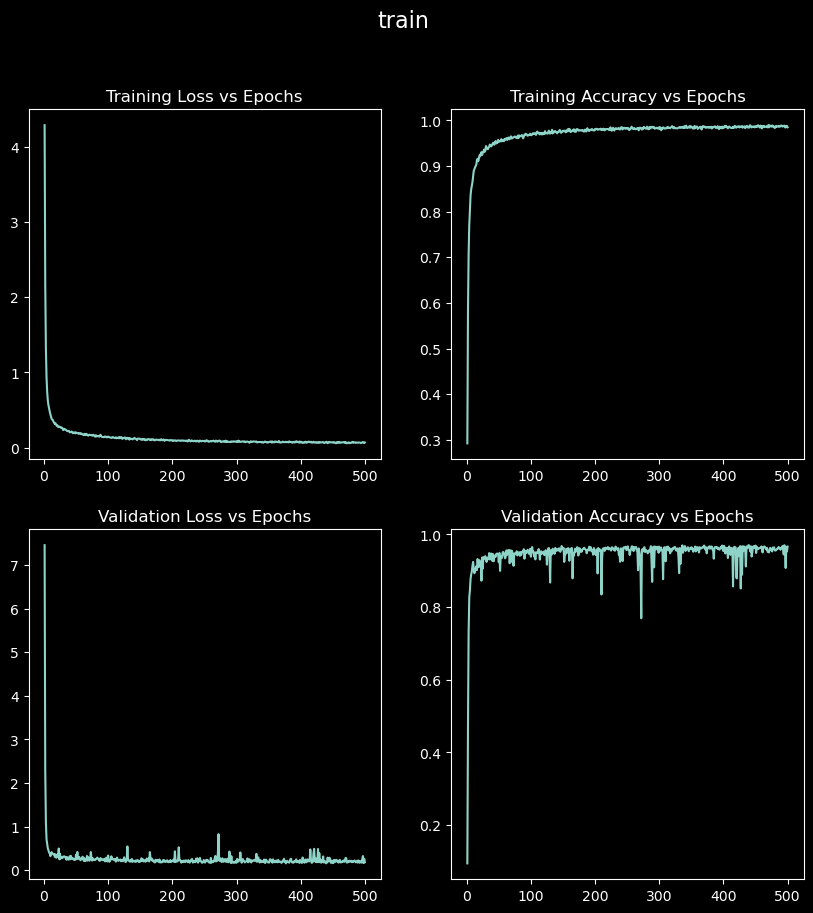

In [166]:
plt.style.use('dark_background')
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 501), y=hist.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 501), y=hist.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 501), y=hist.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 501), y=hist.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training Accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation Accuracy vs Epochs')
fig.suptitle('train', size=16)
plt.show()

# Reporting_Accuracy

In [26]:
y_pred = new_model.predict(images_val)

pred = np.argmax(y_pred, axis=1) + 1
ground = np.argmax(yv, axis=1) + 1

print(classification_report(ground,pred))

84/84 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        96
           2       0.99      0.99      0.99        96
           3       0.93      0.98      0.95        96
           4       0.99      0.92      0.95        96
           5       1.00      0.97      0.98        96
           6       0.97      0.98      0.97        96
           7       0.99      0.98      0.98        96
           8       0.98      0.93      0.95        96
           9       0.99      0.96      0.97        96
          10       0.90      0.99      0.95        96
          11       0.95      0.97      0.96        96
          12       0.98      0.99      0.98        96
          13       1.00      0.98      0.99        96
          14       0.97      0.97      0.97        96
          15       0.99      0.96      0.97        96
          16       0.96      0.98      0.97        96
          17       0.99     

# Confusion_Matrix

<Axes: >

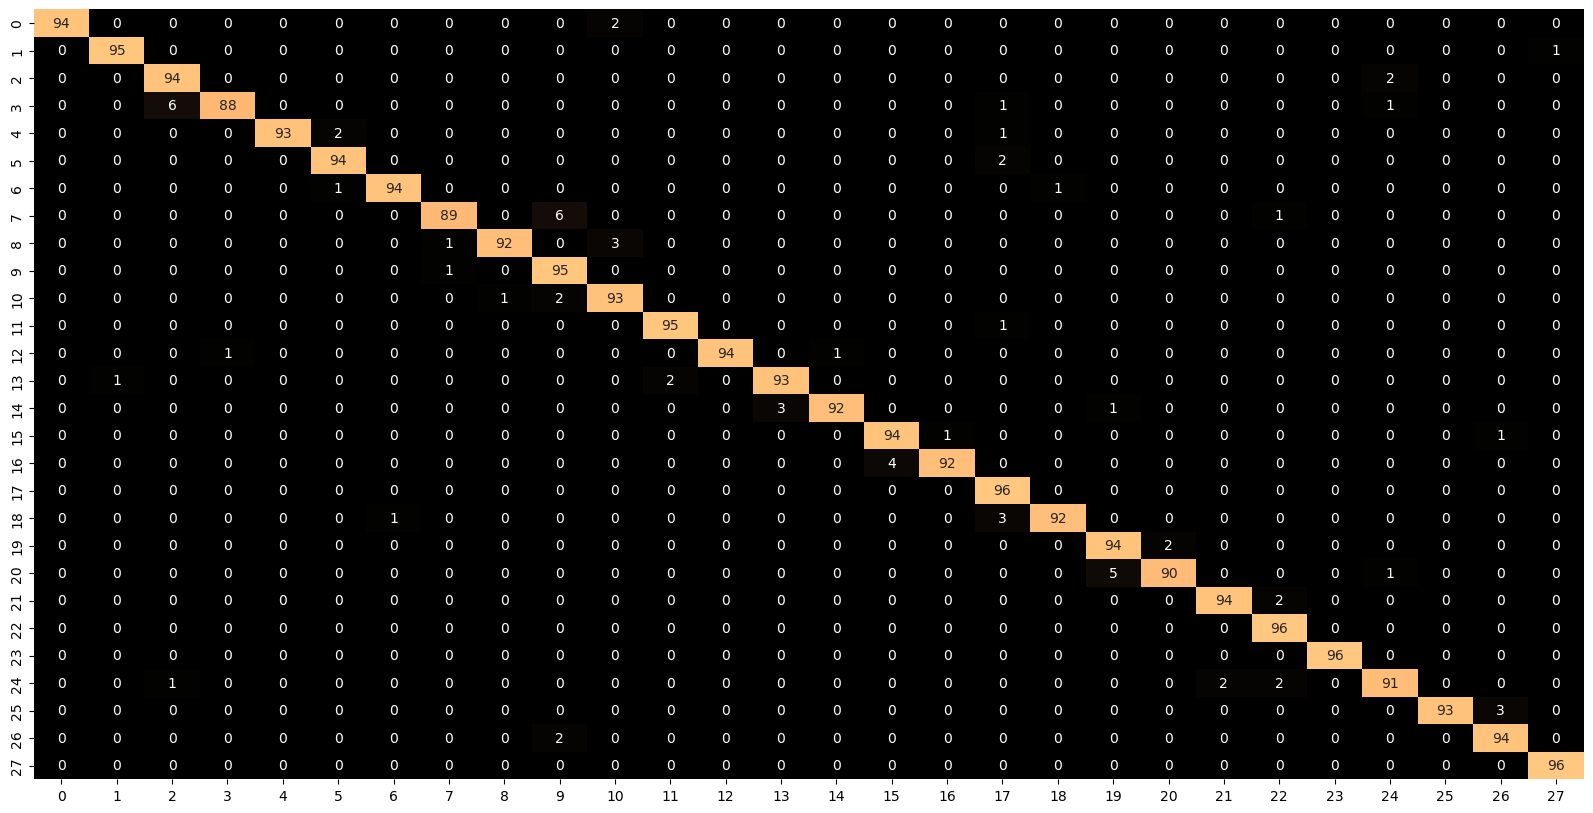

In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig,ax=plt.subplots(figsize=(20,10))
cm = confusion_matrix(validation['labels'],pred)
sns.heatmap(cm,annot=True,cmap="copper",fmt="d",cbar=False,ax=ax)

# ACC

In [60]:
fpr_keras, tpr_keras, thresholds = roc_curve(ground.ravel(), pred.ravel(),pos_label=28)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.9998070987654321

# ROC_Curve

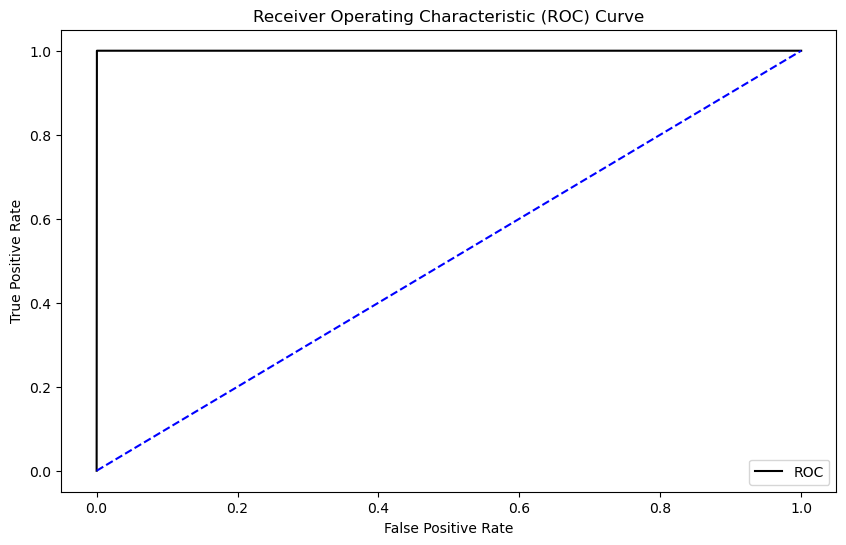

In [63]:
plot_roc_curve(fpr_keras, tpr_keras)

# SHOW_Image_Validtion

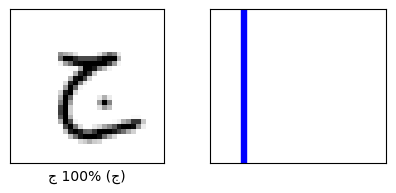

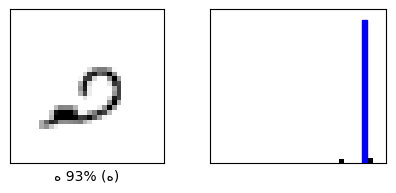

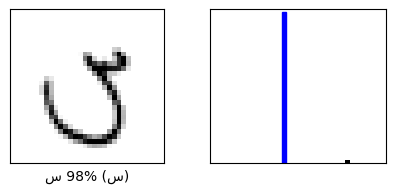

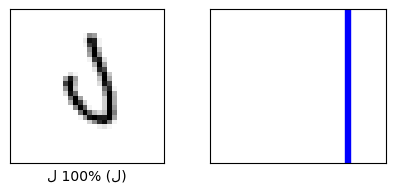

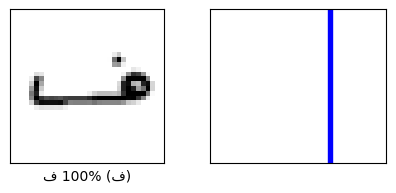

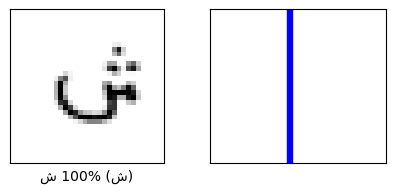

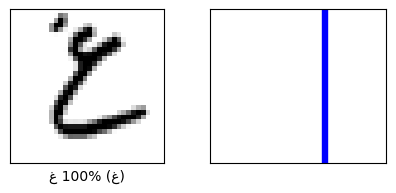

In [36]:
for i in range(7):
  i = np.random.randint(0,2688-1)
  plt.figure(figsize=(5,2))
  plt.subplot(1,2,1)
  plot_image(i, y_pred,ground-1 , images_val)
  plt.subplot(1,2,2)
  plot_value_array(i, y_pred,ground-1  )
  plt.show()

# Preprocessing_and_Evaluation_test

In [21]:
images_test = test_features.reshape((-1, 32, 32, 1))
print("images shape: {}".format(images_test.shape))
images_test = images_test/255

images shape: (3360, 32, 32, 1)


In [25]:
y_pred_test = new_model.predict(images_test)

105/105 [==============================] - 1s 8ms/step


In [171]:
y_pred_test

array([[3.1368704e-17, 1.9528138e-19, 2.4314934e-12, ..., 1.0000000e+00,
        1.2665013e-10, 2.7086229e-16],
       [1.7974264e-10, 2.7174347e-09, 7.6278512e-09, ..., 4.5467781e-09,
        3.0891183e-06, 5.2572000e-09],
       [1.0000000e+00, 1.9624741e-11, 3.0129900e-13, ..., 2.3850150e-15,
        1.1200468e-12, 1.0551101e-17],
       ...,
       [2.8327130e-10, 6.3175787e-10, 5.0966260e-05, ..., 1.9184642e-07,
        2.4389362e-09, 2.3752976e-08],
       [5.1996324e-11, 1.0402631e-12, 1.6925428e-10, ..., 7.2889069e-13,
        7.7734450e-09, 1.1605091e-11],
       [4.3595204e-11, 1.3247445e-10, 9.1555513e-08, ..., 5.2884719e-10,
        5.9562639e-09, 3.7082720e-10]], dtype=float32)

In [69]:
imagesName_test = [re.sub(r'\D', "",os.path.basename(file)) for file in sorted(glob.glob("C:\\Users\\Lenovo\\Desktop\\input\\arabic-hwr-ai-pro-intake1\\test\\*.png"))]
df_test = pd.DataFrame(imagesName_test,columns=["id"])

In [86]:
y_pred_test = new_model.predict(images_test)
test["label"] = np.argmax(y_pred_test, axis=1) + 1

test.head()

105/105 [==============================] - 1s 5ms/step


,id,label
0,0,26
1,1,10
2,2,1
3,3,10
4,4,15


In [180]:
df_test[['id', 'label']].to_csv('model.csv', index=False)

# Show_images

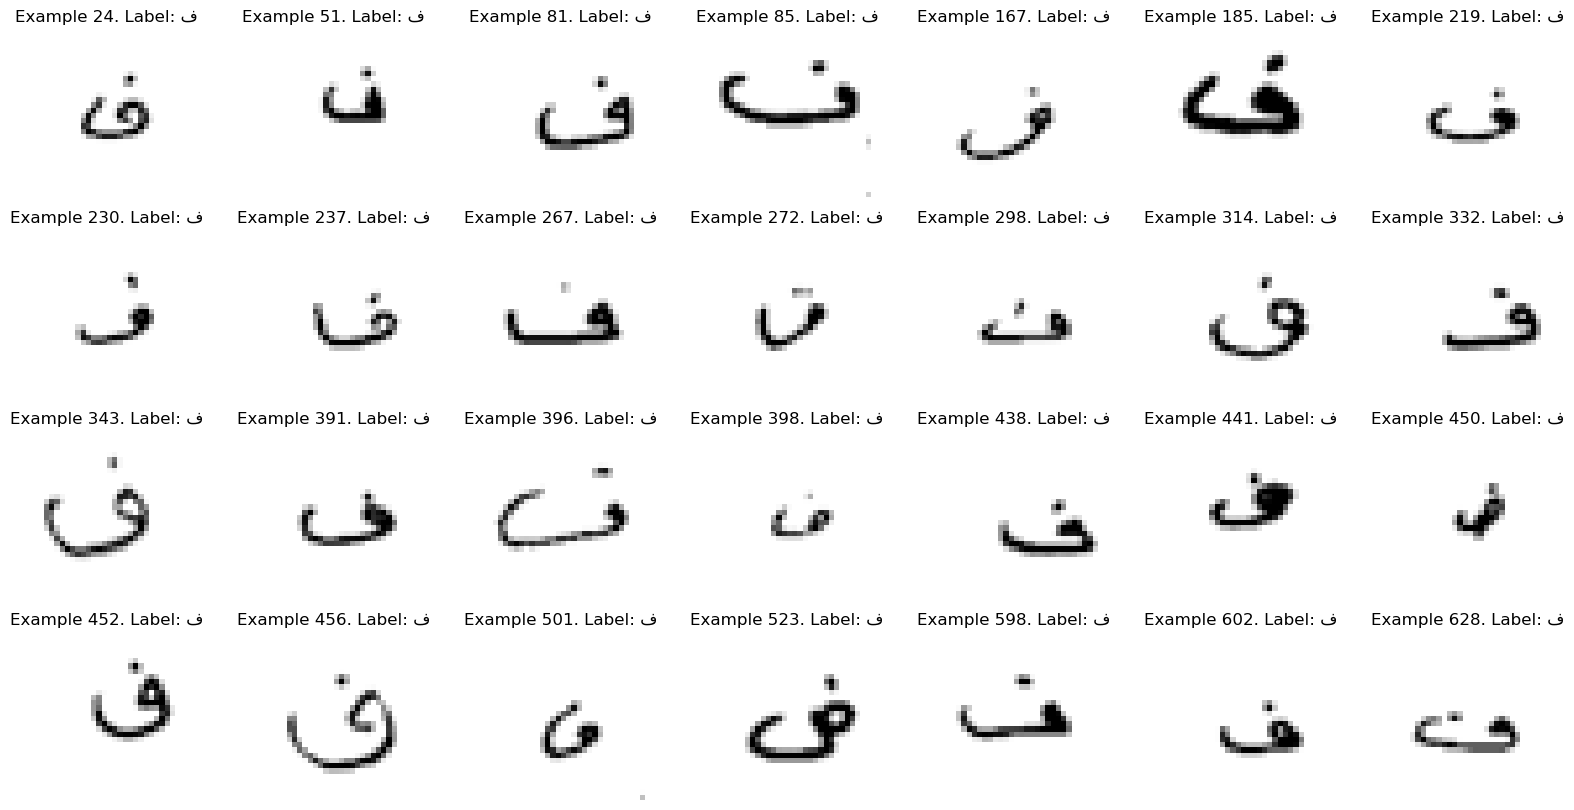

In [89]:
fig, ax = plt.subplots(4, 7, figsize=(20, 10))
index_list = test[test['label']==20].iloc[:28, :]['id'].tolist()
i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        display_image(test_features, test['label']-1, index_list[i])
        plt.axis('off')
        i+=1

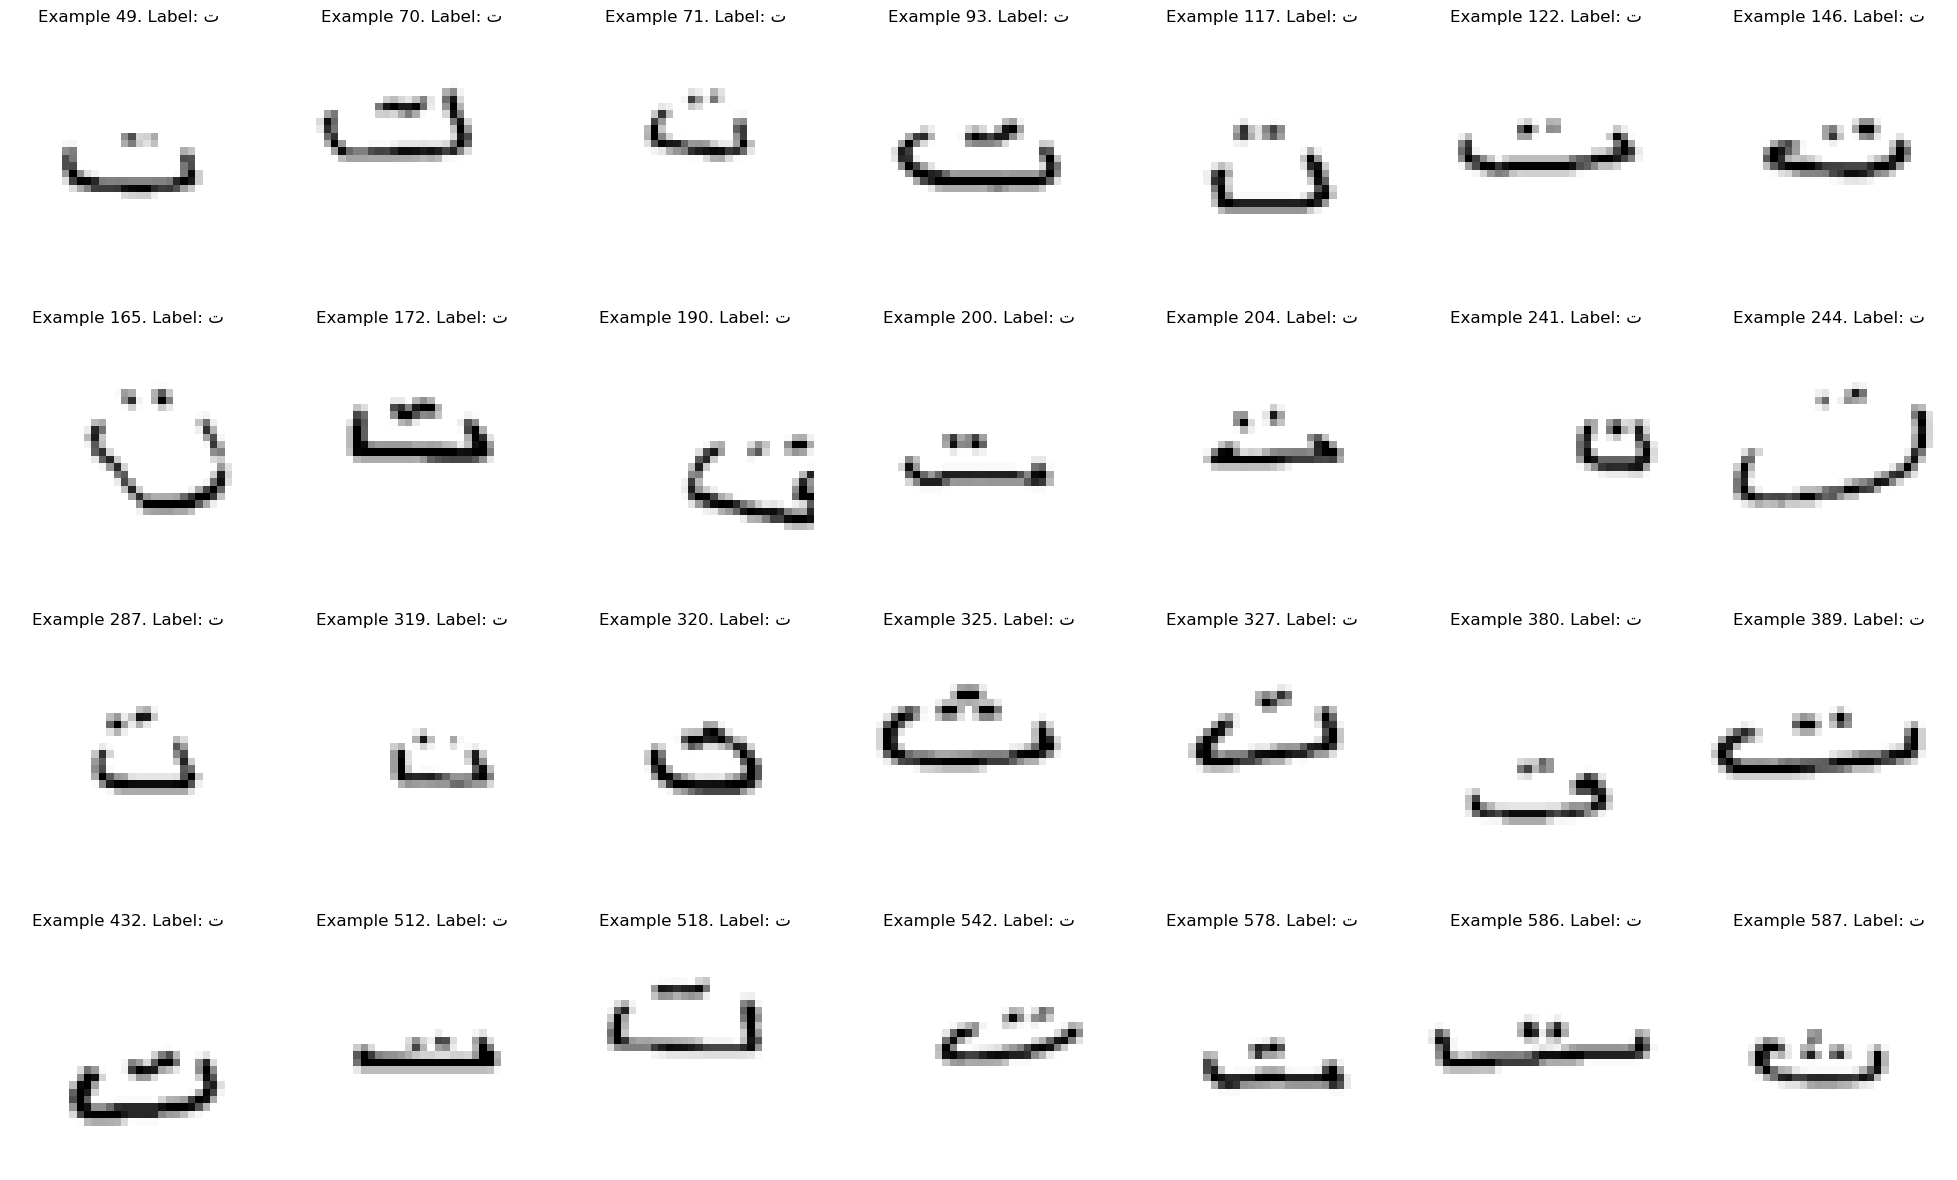

In [97]:
fig, ax = plt.subplots(4, 7, figsize=(25, 15))
index_list = test[test['label']==3].iloc[:28, :]['id'].tolist()
i = 0
for row in range(4):
    for col in range(7):
        plt.sca(ax[row, col])
        display_image(test_features, test['label']-1, index_list[i])
        plt.axis('off')
        i+=1